In [3]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
# 정규성, 절편 만들기
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ....)
import statsmodels.formula.api as smf
# 평가함수 (Root Mean Square Error)
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

# 단순선형회귀

In [4]:
df_raw = pd.read_csv("/home/pirl/Desktop/Statistics/Big Data Analyze/부품수리시간.csv", engine="python")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [5]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


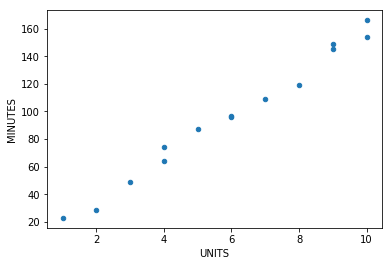

In [6]:
df_raw.plot.scatter(x='UNITS', y='MINUTES')

In [7]:
df_raw.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [8]:
reg_model = smf.ols(formula='MINUTES ~ UNITS', data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.92e-13
Time:                        10:08:38   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


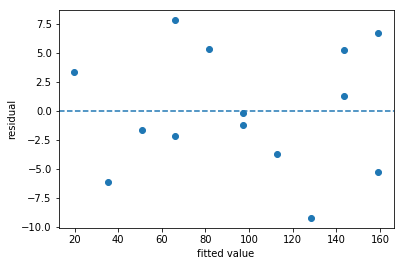

In [10]:
# 잔차 산점도 : X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

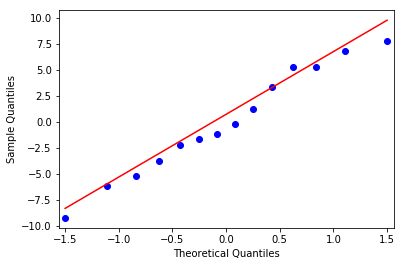

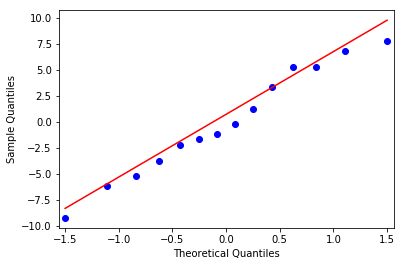

In [11]:
qqplot(reg_result.resid, line='q')

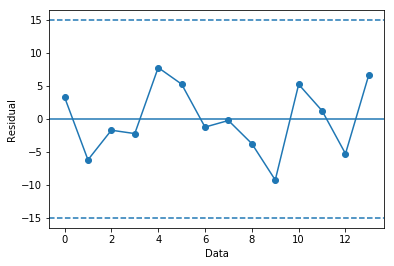

In [14]:
plt.plot(df_raw.index, reg_result.resid, marker='o')
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0, linestyle='-')
plt.axhline(y=3*np.std(reg_result.resid), linestyle='--')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle='--')

# 다중회귀분석

In [15]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [16]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


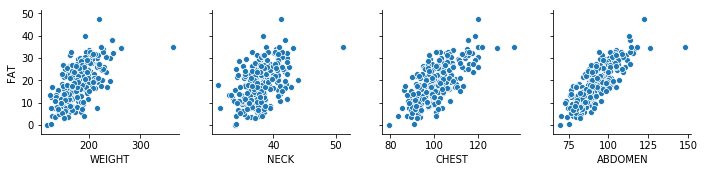

In [21]:
sns.pairplot(df_raw, y_vars="FAT",  x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"])

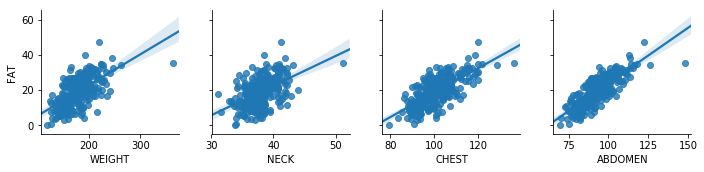

In [19]:
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind="reg")

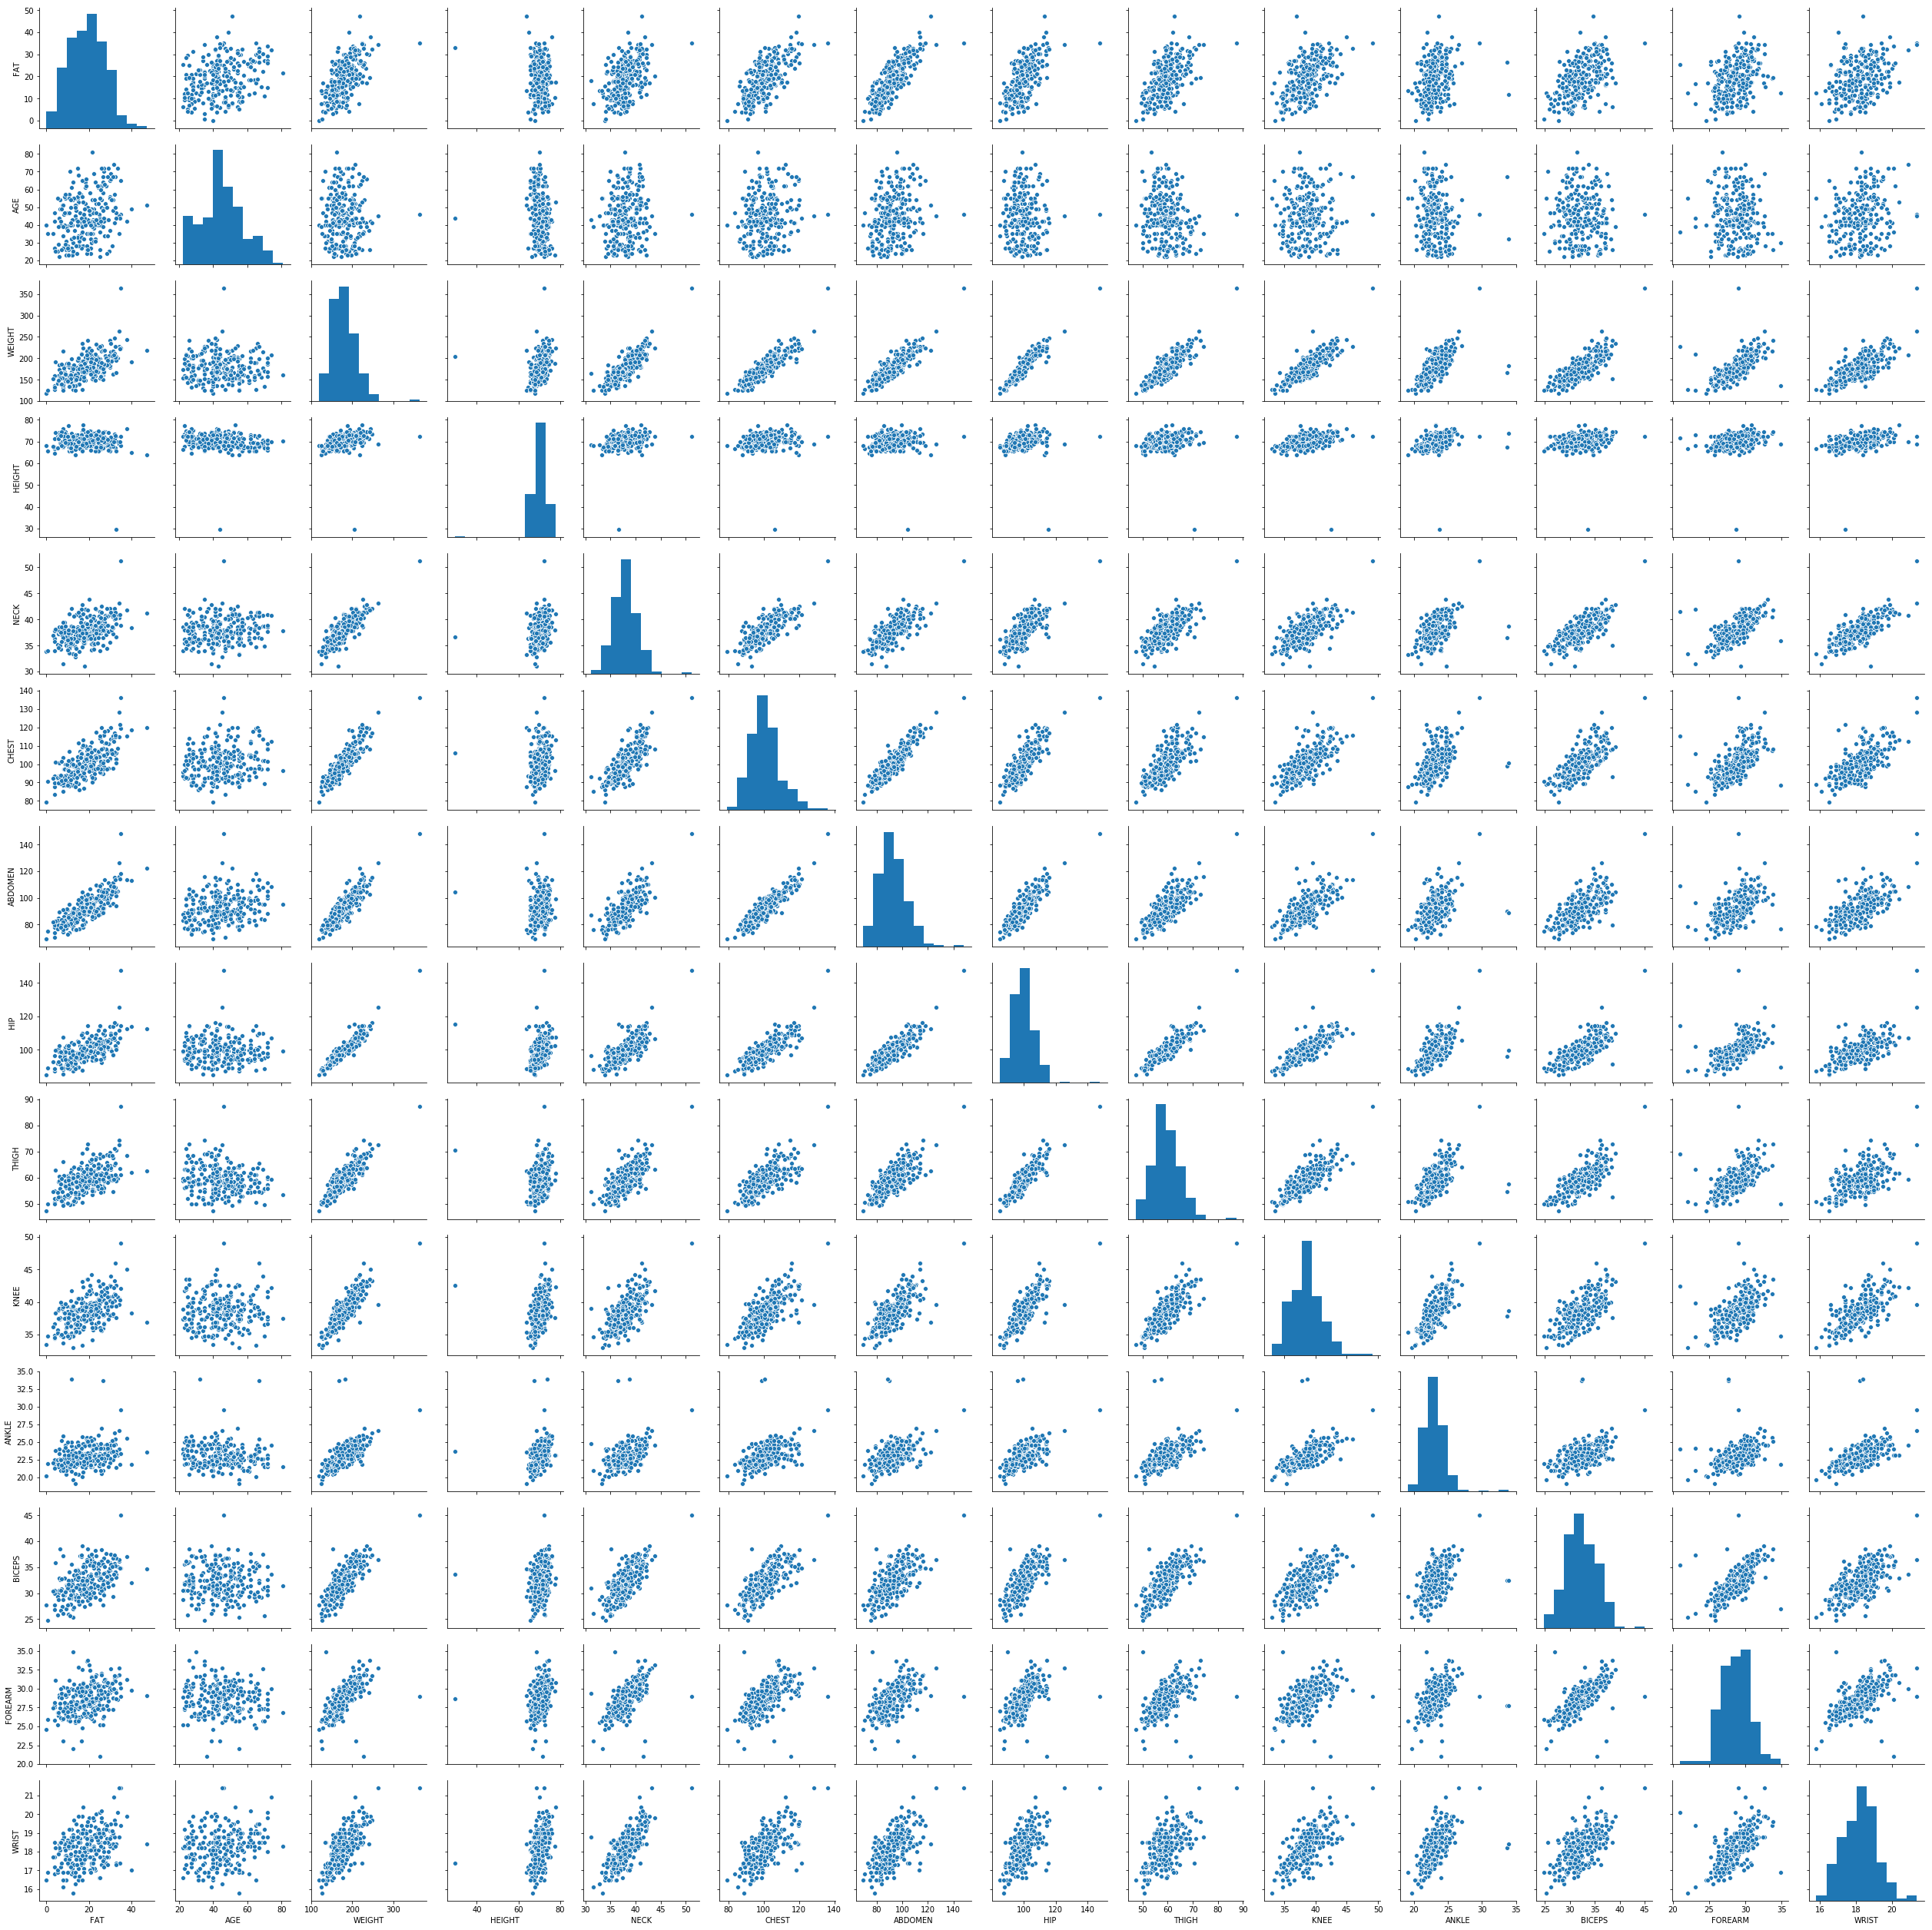

In [22]:
sns.pairplot(df_raw)

In [23]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [24]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                                KNEE + ANKLE + BICEPS + FOREARM + WRIST", data=df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.72e-64
Time:                        10:49:54   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [26]:
df_raw.shape

(252, 14)

In [33]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("FAT", axis=1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 값이 큰 WEIGHT, ABDOMEN를 제거
df_raw_x_const = df_raw_x_const.drop("WEIGHT", axis=1)
df_raw_x_const = df_raw_x_const.drop("ABDOMEN", axis=1)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
2,HEIGHT,1.329
1,AGE,1.762
8,ANKLE,1.838
10,FOREARM,2.186
11,WRIST,3.258
9,BICEPS,3.481
3,NECK,3.923
7,KNEE,4.311
4,CHEST,4.883
6,THIGH,7.575


In [43]:
reg_model = smf.ols(formula = "FAT ~ AGE + CHEST + THIGH + WRIST", data=df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     94.89
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.95e-49
Time:                        11:35:50   Log-Likelihood:                -775.16
No. Observations:                 252   AIC:                             1560.
Df Residuals:                     247   BIC:                             1578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.6593      6.569     -4.972      0.0

In [45]:
df_raw_y = df_raw['FAT']
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [48]:
df_select_x = df_raw_x[['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST']]
df_select_x_const = add_constant(df_select_x)

df_select_vif = pd.DataFrame()
df_select_vif["variable"] = df_select_x_const.columns
df_select_vif["VIF"] = [variance_inflation_factor(df_select_x_const.values, i) for i in range(df_select_x_const.shape[1])]

df_select_vif.sort_values("VIF", inplace=True)
df_select_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


In [50]:
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data=df_raw)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        11:55:26   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

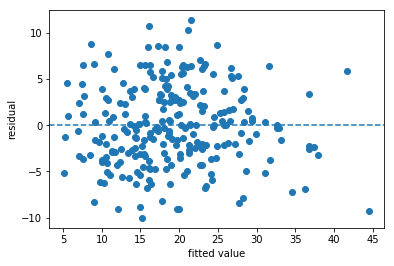

In [51]:
# 잔차 분석
# 잔차 산점도 (등분산성)
plt.scatter(rfe_reg_result.fittedvalues, rfe_reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

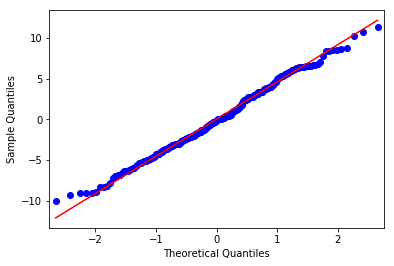

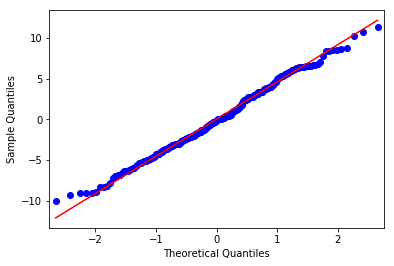

In [52]:
qqplot(rfe_reg_result.resid, line='q')

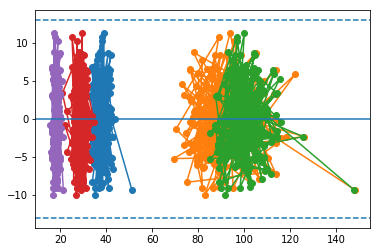

In [53]:
plt.plot(df_select_x, rfe_reg_result.resid, marker = 'o')
plt.axhline(y=0, linestyle='-')
plt.axhline(y=3*np.std(rfe_reg_result.resid), linestyle='--')
plt.axhline(y=-3*np.std(rfe_reg_result.resid), linestyle='--')

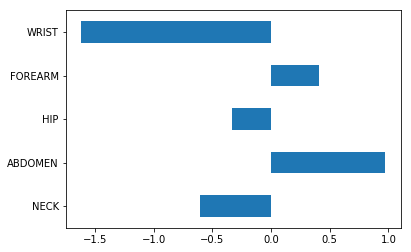

In [55]:
# 회귀계수 그래프
df_reg_coef = pd.DataFrame({"Coef" : rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y="Coef", legend=False)

In [56]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_select_x.columns
# Scale 변환
np_scaled = scaler.fit_transform(df_select_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
# 목표변수 추가
df_scaled["FAT"] = df_raw["FAT"]
reg_model_scaled = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data=df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        13:40:04   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

## 다중회귀분석 실습

In [57]:
df_diabetes = pd.read_csv("/home/pirl/Desktop/Statistics/Big Data Analyze/DIABETES.csv", engine="python")
df_diabetes.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [60]:
# 결측치 확인
df_diabetes.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

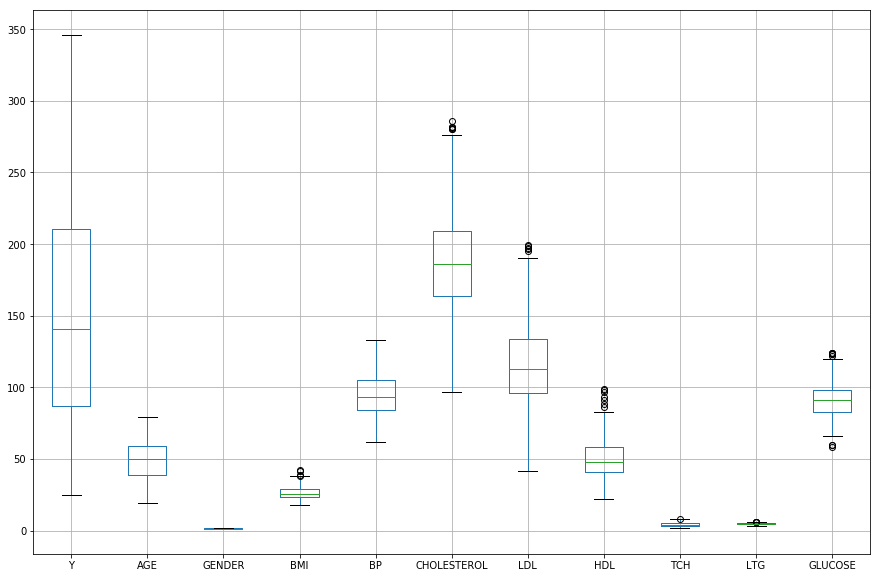

In [108]:
# 이상치 확인
df_diabetes.boxplot(figsize=(15,10))

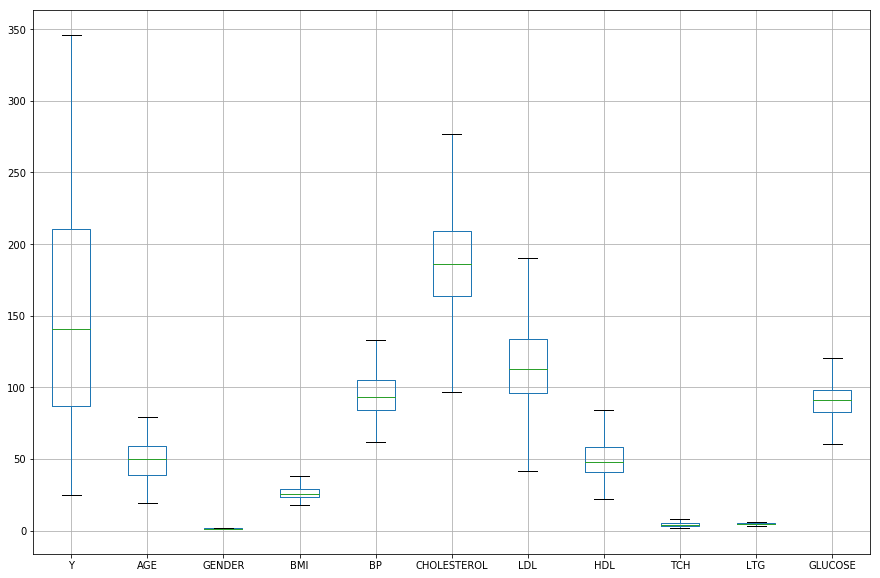

In [137]:
# 이상치 제거
for i in range(1, 11, 1) :
    num1, num2 = np.percentile(df_diabetes.iloc[:,[i]], [25, 75])
    
    iqr_max = num2 + 1.5 * (num2- num1)
    iqr_min = num1 - 1.5 * (num2- num1)
    
    for j in range(0, len(df_diabetes.iloc[:,[i]])) :
        if (df_diabetes.iloc[j,i] > iqr_max):
            df_diabetes.iloc[j,i] = iqr_max
        elif (df_diabetes.iloc[j,i] < iqr_min) :
            df_diabetes.iloc[j,i] = iqr_min
            
df_diabetes.boxplot(figsize=(15,10))

In [72]:


df_diabetes = df_diabetes[df_diabetes["LDL"]<200]
df_diabetes.reset_index(drop = True, inplace=True)
df_diabetes

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
5,97,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68
6,138,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82
7,63,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92
8,110,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94
9,310,29,1,30.0,85.00,180,93.4,43.0,4.00,5.3845,88


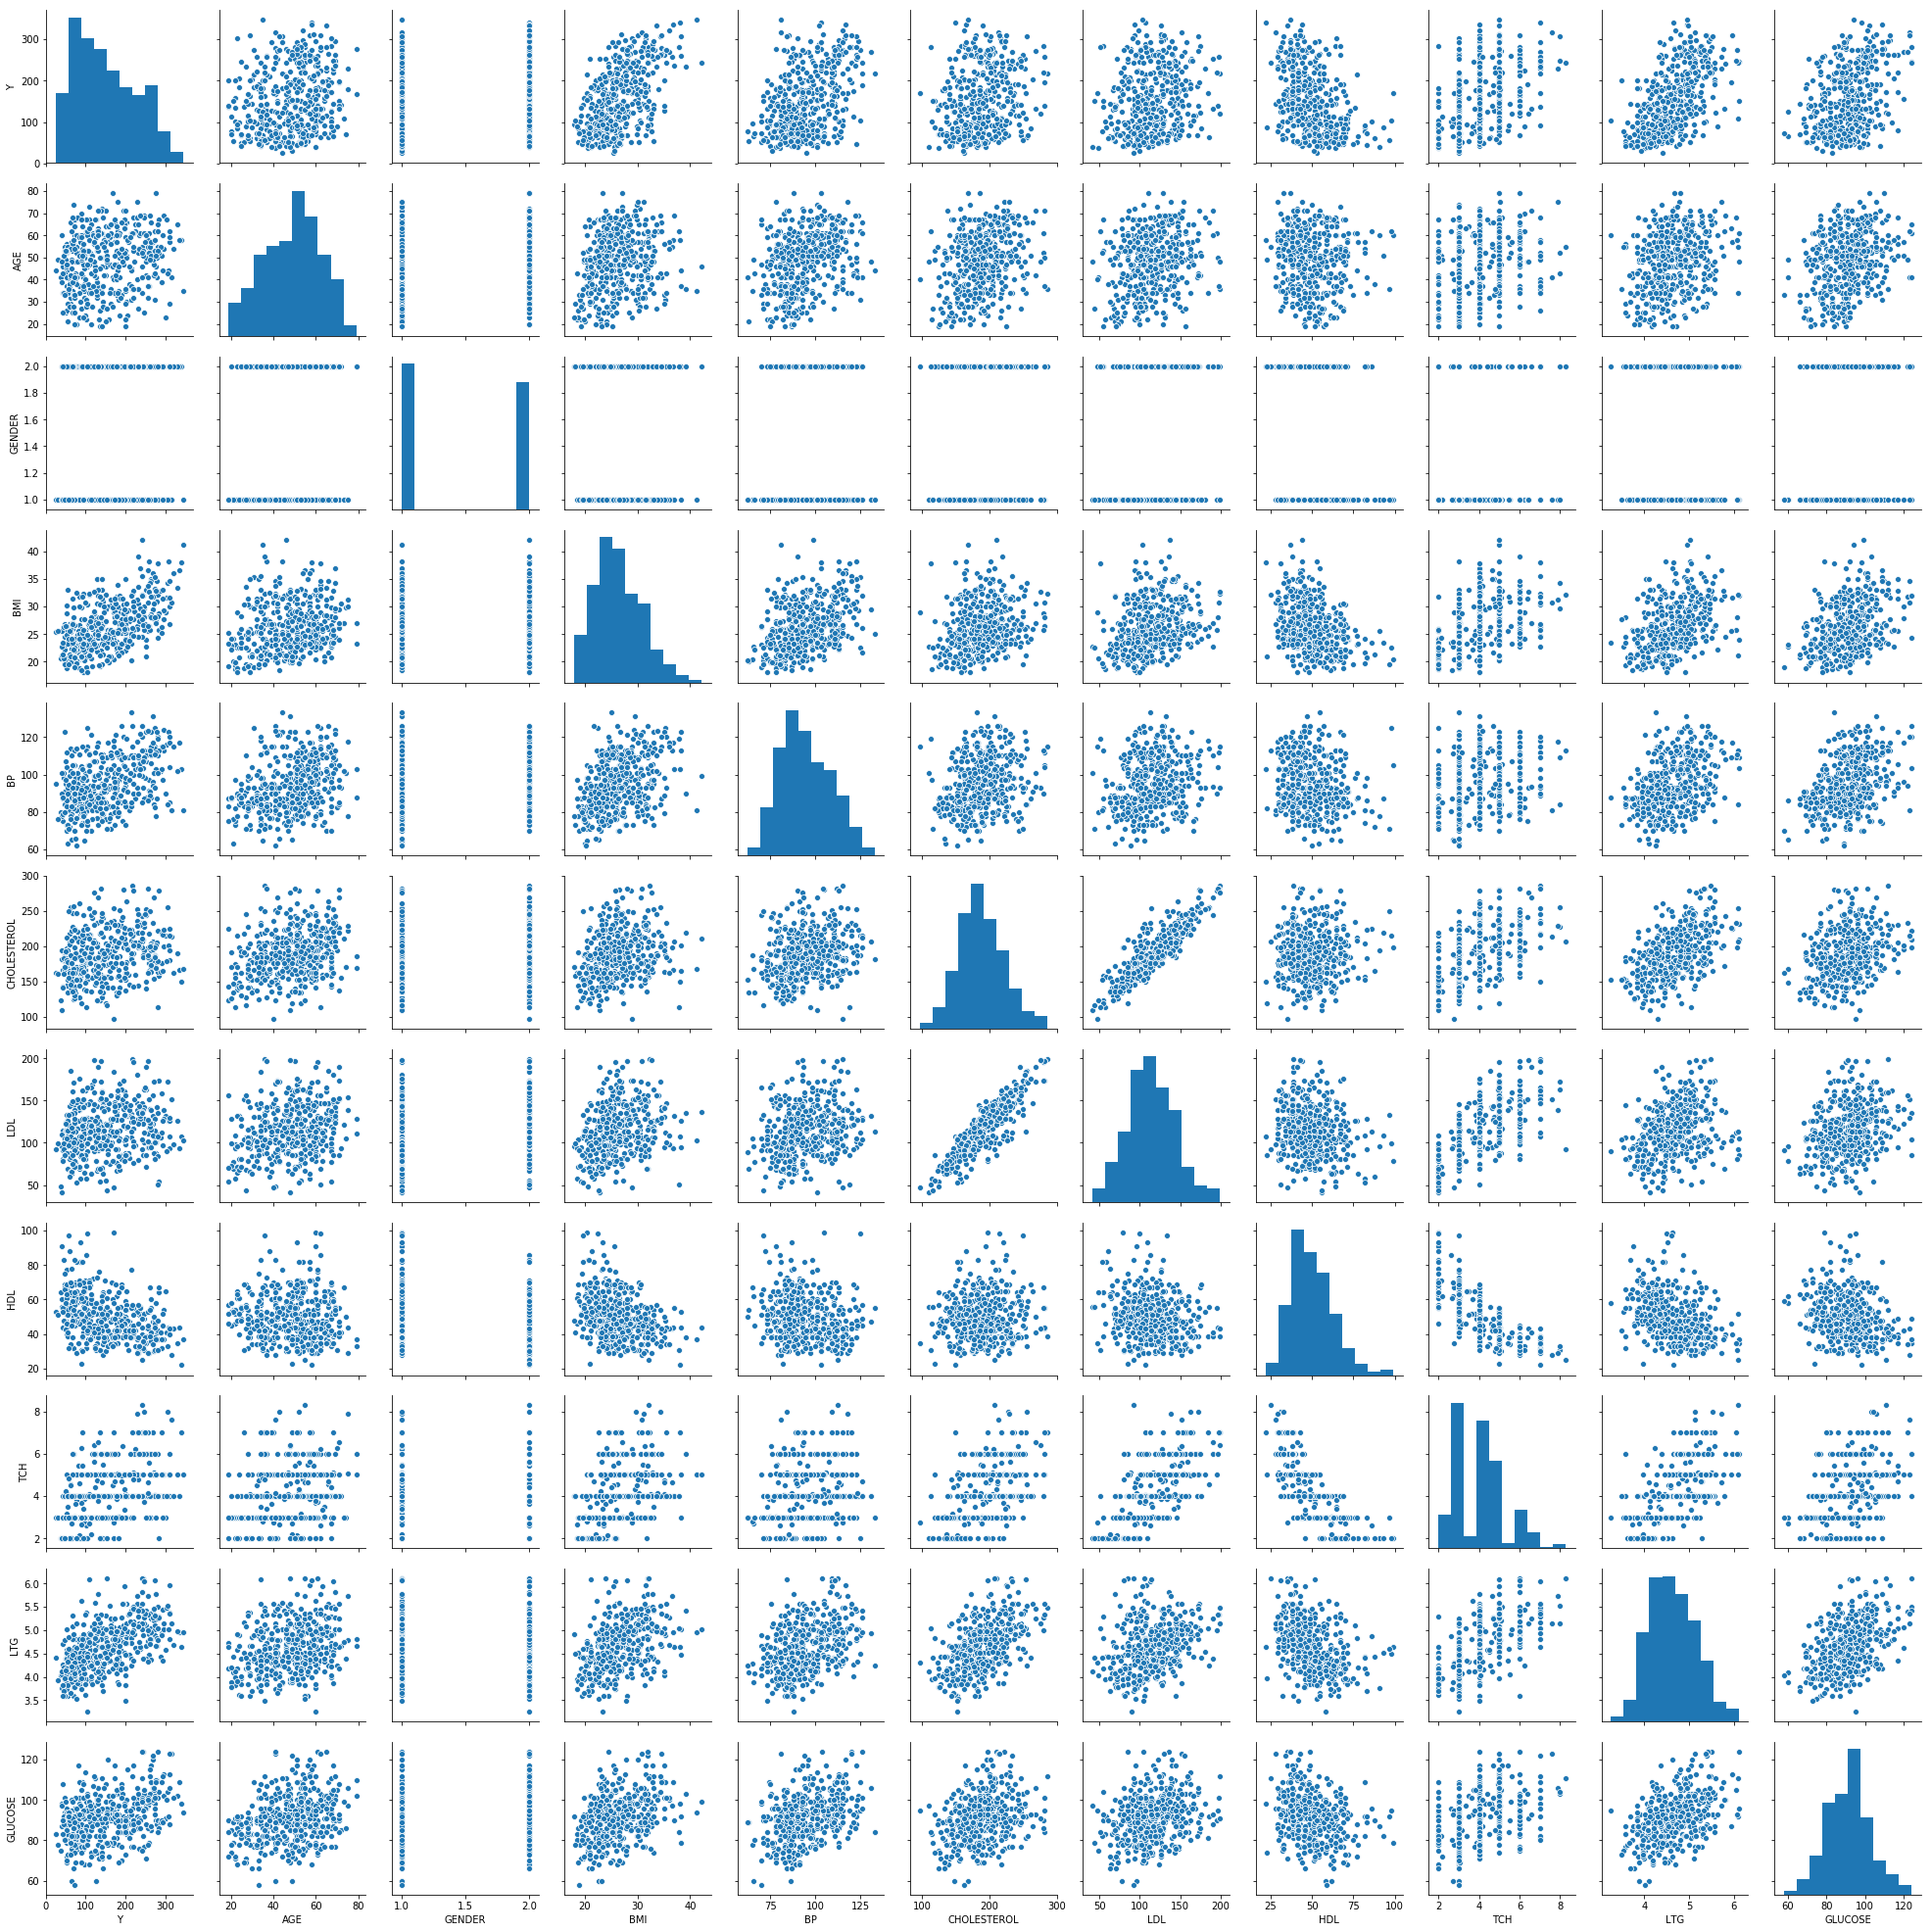

In [73]:
sns.pairplot(df_diabetes)

In [74]:
df_diabetes.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.190,0.043,0.588,0.445,0.218,0.182,-0.399,0.445,0.566,0.385
AGE,0.190,1.000,0.176,0.188,0.334,0.272,0.232,-0.075,0.210,0.273,0.306
GENDER,0.043,0.176,1.000,0.083,0.245,0.020,0.129,-0.378,0.326,0.147,0.202
BMI,0.588,0.188,0.083,1.000,0.401,0.240,0.252,-0.367,0.412,0.444,0.384
BP,0.445,0.334,0.245,0.401,1.000,0.258,0.202,-0.179,0.268,0.398,0.397
CHOLESTEROL,0.218,0.272,0.020,0.240,0.258,1.000,0.892,0.062,0.526,0.518,0.313
LDL,0.182,0.232,0.129,0.252,0.202,0.892,1.000,-0.191,0.645,0.318,0.275
HDL,-0.399,-0.075,-0.378,-0.367,-0.179,0.062,-0.191,1.000,-0.743,-0.399,-0.271
TCH,0.445,0.210,0.326,0.412,0.268,0.526,0.645,-0.743,1.000,0.625,0.409
LTG,0.566,0.273,0.147,0.444,0.398,0.518,0.318,-0.399,0.625,1.000,0.463


In [98]:
Dreg_model = smf.ols(formula = "Y ~ AGE + C(GENDER) + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE",
                    data = df_diabetes)
Dreg_result = Dreg_model.fit()
print(Dreg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     46.56
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.35e-62
Time:                        14:24:39   Log-Likelihood:                -2374.2
No. Observations:                 440   AIC:                             4770.
Df Residuals:                     429   BIC:                             4815.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -363.9829     67.019     -5.

### 선택적 변수 제거법 사용

In [86]:
df_Draw_x = df_diabetes.drop(['Y', 'GENDER', 'CHOLESTEROL'], axis=1)
df_Draw_x_const = add_constant(df_Draw_x)
df_Dvif = pd.DataFrame()
df_Dvif["variable"] = df_Draw_x_const.columns
df_Dvif["VIF"] = [variance_inflation_factor(df_Draw_x_const.values, i) for i in range(df_Draw_x_const.shape[1])]
df_Dvif.sort_values("VIF", inplace=True)
df_Dvif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.209
3,BP,1.418
8,GLUCOSE,1.469
2,BMI,1.469
7,LTG,2.177
4,LDL,2.787
5,HDL,3.635
6,TCH,7.655
0,const,200.325


In [93]:
# AGE > TCH > GLUCOSE > LDL
Dreg_model = smf.ols(formula = "Y ~ C(GENDER) + BMI + BP + HDL + LTG",
                    data = df_diabetes)
Dreg_result = Dreg_model.fit()
print(Dreg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     90.79
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.07e-65
Time:                        14:19:14   Log-Likelihood:                -2378.4
No. Observations:                 440   AIC:                             4769.
Df Residuals:                     434   BIC:                             4793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -237.4639     34.306     -6.

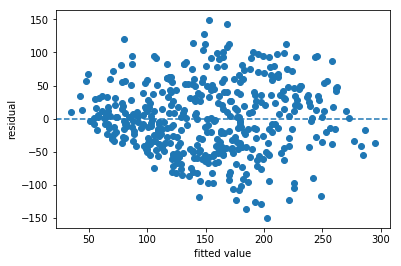

In [94]:
plt.scatter(Dreg_result.fittedvalues, Dreg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

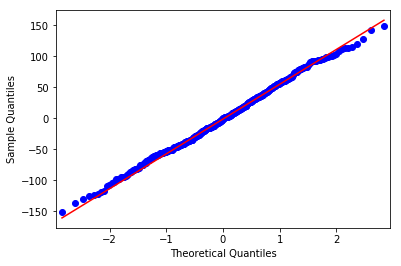

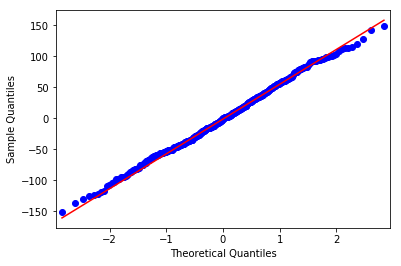

In [96]:
qqplot(Dreg_result.resid, line='q')

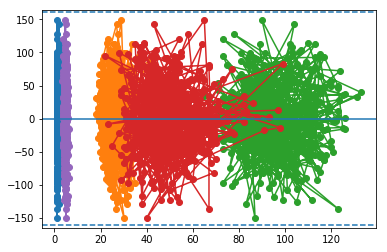

In [97]:
D_select_x = df_diabetes[['GENDER', 'BMI', 'BP', 'HDL', 'LTG']]
plt.plot(D_select_x, Dreg_result.resid, marker = 'o')
plt.axhline(y=0, linestyle='-')
plt.axhline(y=3*np.std(Dreg_result.resid), linestyle='--')
plt.axhline(y=-3*np.std(Dreg_result.resid), linestyle='--')

### 후진제거법을 이용한 변수 선택

In [100]:
df_diabetes_y = df_diabetes['Y']
df_diabetes_x = df_diabetes.drop(['Y'], axis = 1)

model = LinearRegression()
Drfe = RFE(estimator = model, n_features_to_select = 5).fit(df_diabetes_x, df_diabetes_y)
selected_Dcols = df_diabetes_x.columns[Drfe.support_]
removed_Dcols = df_diabetes_x.columns[~Drfe.support_]
print("Selected Variables : {}".format(selected_Dcols))
print("Removed Variables : {}".format(removed_Dcols))

Selected Variables : Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
Removed Variables : Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [102]:
df_diabetes_x_rfe = df_diabetes_x[selected_Dcols]
df_diabetes_x_rfe = df_diabetes_x_rfe.drop(['GENDER'], axis=1)
df_diabetes_x_rfe_const = add_constant(df_diabetes_x_rfe)

df_Drfe_vif = pd.DataFrame()
df_Drfe_vif["variable"] = df_diabetes_x_rfe_const.columns
df_Drfe_vif["VIF"] = [variance_inflation_factor(df_diabetes_x_rfe_const.values, i) for i in range(df_diabetes_x_rfe_const.shape[1])]
df_Drfe_vif.sort_values("VIF", inplace=True)
df_Drfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
2,BP,1.285
1,BMI,1.398
3,TCH,1.704
4,LTG,1.870
0,const,106.487


In [105]:
Drfe_reg_model = smf.ols(formula = "Y ~ C(GENDER) + BMI + BP + TCH + LTG", data = df_diabetes)
Drfe_reg_result = Drfe_reg_model.fit()
print(Drfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     84.90
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.39e-62
Time:                        14:37:08   Log-Likelihood:                -2385.8
No. Observations:                 440   AIC:                             4784.
Df Residuals:                     434   BIC:                             4808.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -322.2704     27.134    -11.

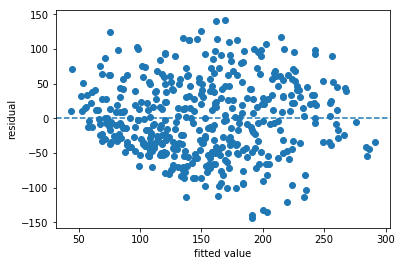

In [106]:
plt.scatter(Drfe_reg_result.fittedvalues, Drfe_reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")